In [1]:
import climate_functions as cf
import numpy as np
import synthetic_data as sd
import network_builder as nb
import networkx as nx
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
#from fastdtw import fastdtw
#from dtaidistance import dtw
#from dtaidistance import dtw_visualisation as dtwvis
#from dtaidistance import clustering
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
sns.set()
import random
import pandas as pd
from netCDF4 import Dataset
from stldecompose import decompose, forecast
import folium
import math
import scipy.stats as st

import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mohammad5617', api_key='yElRsXEjk0sRoqCmfVBn')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
f_pre = Dataset('precipitation.nc')
#f_pre = Dataset('precip.mon.total.v501.nc')

#f_temp = Dataset('temperatureCDC.nc') 
pr = f_pre.variables['precip']
lon = f_pre.variables['lon'][:]
lat = f_pre.variables['lat'][:]
pr = np.swapaxes(pr,0,2)

In [3]:
lat[10], lat[16], lon[16], lon[23]

(13.75, -1.25, 16.25, 33.75)

In [4]:
m = folium.Map(location=[6.25, 25.25],zoom_start = 5)

In [97]:
lat[10]

13.75

In [61]:
np.where(lon == 31.25)[0][0]

22

In [64]:
np.where(lat == 31.25)[0][0]

3

In [235]:
data = pr[10:22,3:11,:]

In [57]:
data = pr[16:23,10:16,:]

In [20]:
data = pr[16:23,16:20,:]

In [58]:
data = cf.unflatten(data)

In [59]:
data = np.swapaxes(data,0,1)

In [60]:
M = data.shape[0]
#data = sd.synthetic_data_generator(M = M)

In [20]:
def deseasonal_STL(data):
    n = data.shape[1]
    N = data.shape[0]
    data_deseasonal = np.zeros(data.shape)
    data_seasonal = np.zeros(data.shape)
    for i in range(n):
        decomp = decompose(data[:,i], period=12)
        data_deseasonal[:,i] = decomp.trend + decomp.resid
        data_seasonal[:,i] = decomp.seasonal
    return(data_deseasonal, data_seasonal)

In [25]:
data = deseasonal_STL(data)

In [75]:
def deseasonal_monthly_anomaly(data):
    n  = data.shape[1]
    N  = data.shape[0]
    averages = np.zeros((12,n))
    data_deseasonal = np.zeros(data.shape)
    for i in range(n):
        temp = data[:,i]
        result = np.zeros((N))
        for j in range(12):
            Idx = np.arange(j,N,12)
            averages[j,i] = temp[Idx].mean()
            result[Idx] = temp[Idx] - temp[Idx].mean()
        data_deseasonal[:,i] = result
    return(data_deseasonal, averages)  

In [53]:
data = deseasonal_Anomaly(data)

In [180]:
data.shape

(841, 42)

In [171]:
b = np.array([12,12,13,12])

In [179]:
temp = np.array([2,2,2,12,2,2,2,13,3,2,3,14])
N = temp.shape[0]
result = np.zeros((N))
for j in range(4):
    Idx = np.arange(j,N,4)
   # print(temp[Idx])    
   # avg = temp[Idx].mean()
    result[Idx]= temp[Idx] - temp[Idx].mean()
  #  for i in range(len(Idx)):
   #     result[Idx[i]] = a[i]
        #print(temp[Idx[i]])
    #print(temp)
result

array([-0.33333333,  0.        , -0.33333333, -1.        , -0.33333333,
        0.        , -0.33333333,  0.        ,  0.66666667,  0.        ,
        0.66666667,  1.        ])

In [42]:
list(temp[j:j+4] - temp[j:j+4].mean())

[-2.5, -2.5, -2.5, 7.5]

In [22]:
def deseasonal_annual_anomaly(data):
    n  = data.shape[1]
    N  = data.shape[0]    
    data_deseasonal = np.zeros(data.shape)
    for i in range(n):
        temp = data[:,i]
        temp_list = []
        for j in range(0,N,12):   
            temp_list.append(list(temp[j:j+12] - temp[j:j+12].mean()))
            flat_list = [item for sublist in temp_list for item in sublist]
        data_deseasonal[:,i] = np.array(flat_list)
    return(data_deseasonal)

In [194]:
data = deseasonal_annual_anomaly(data)

In [161]:
a = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,14])

In [159]:
temp = np.empty(3)

In [160]:
temp

array([5.e-324, 5.e-324, 5.e-324])

In [176]:
temp = []
for j in range(0,12,4):
    temp.append(list(a[j:j+4] - a[j:j+4].mean()))

In [177]:
temp

[[-1.5, -0.5, 0.5, 1.5], [-1.5, -0.5, 0.5, 1.5], [-1.5, -0.5, 0.5, 1.5]]

In [178]:
flat_list = [item for sublist in temp for item in sublist]

In [180]:
flat_list

[-1.5, -0.5, 0.5, 1.5, -1.5, -0.5, 0.5, 1.5, -1.5, -0.5, 0.5, 1.5]

In [114]:
a[0:4] - a[0:4].mean()

array([-1.5, -0.5,  0.5,  1.5])

In [120]:
a

array([-1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  0,  1,  0])

In [82]:
temp = np.arange(0,37)

In [83]:
temp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [84]:
for j in range(12):
    Idx = np.arange(j,len(temp),12)
    temp[Idx] = temp[Idx] - temp[Idx].mean()

In [85]:
temp

array([-18, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12,  -6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  18])

In [91]:
(11+23+35)/3

23.0

In [267]:
r = np.arange(0.1,1,0.05)
p_limit = []
z_limit = []
for i in range(len(r)):
    
    n = data.shape[1]
    m = nb.weighted_matrix(data[:M-2,:])
    m = np.absolute(m)
    # G, c = nb.graph_builder_limit(m, r[i])

    np.fill_diagonal(m, 0)
    Z = abs(np.arctanh(m))
    N = data.shape[0]
    SE = 1/math.sqrt(N-3)
    Z_real = np.arctanh(0)
    Z = (Z-Z_real)/SE
    p = st.norm.cdf(Z)

    adjacency_matrix = np.zeros(m.shape)
    adjacency_matrix[m > r[i]] = 1
    
    p_limit.append(p[adjacency_matrix.astype(int) == 1].min())
    z_limit.append(Z[adjacency_matrix.astype(int) == 1].min())
    
    

ValueError: zero-size array to reduction operation minimum which has no identity

In [275]:
len(p_limit)

15

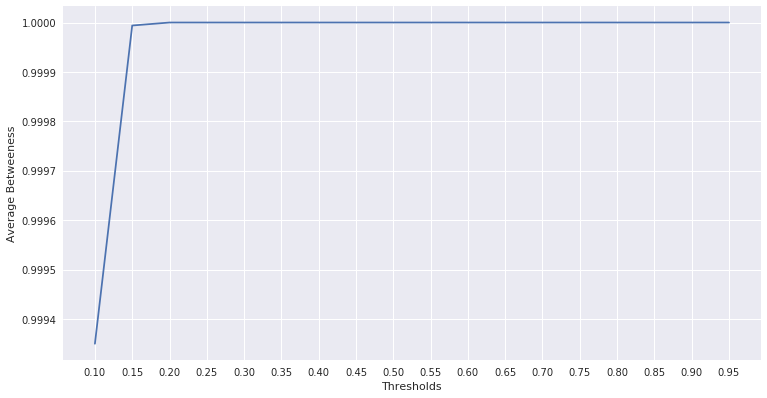

In [262]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Average Betweeness")
plt.xlabel("Thresholds")
plt.plot(r,p_limit);

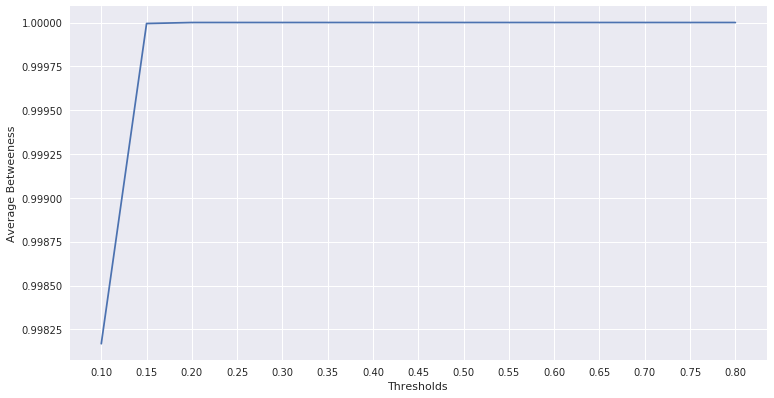

In [276]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Average Betweeness")
plt.xlabel("Thresholds")
plt.plot(r[:15],p_limit);

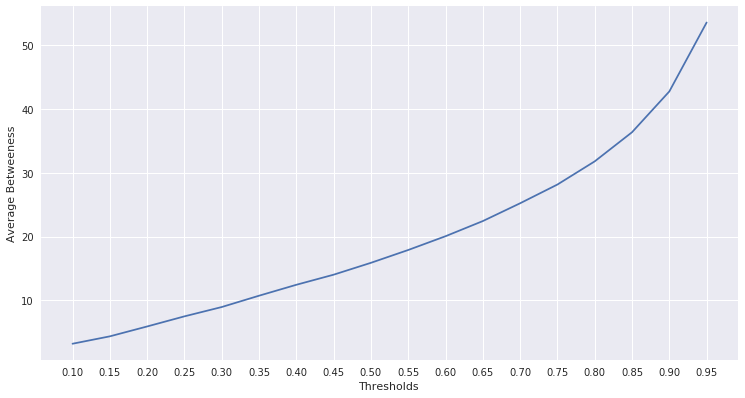

In [263]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Average Betweeness")
plt.xlabel("Thresholds")
plt.plot(r,z_limit);

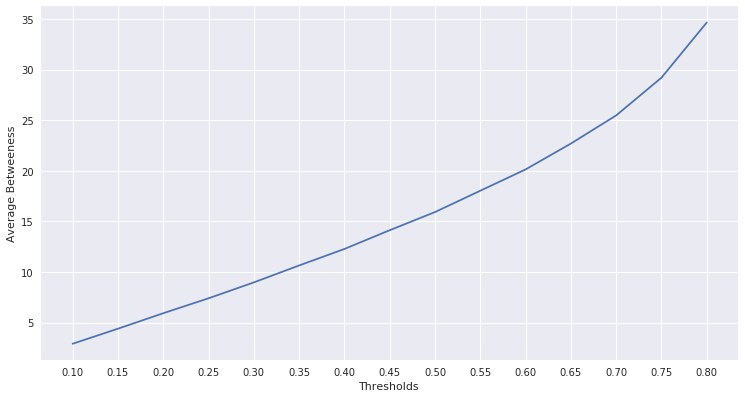

In [277]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Average Betweeness")
plt.xlabel("Thresholds")
plt.plot(r[:15],z_limit)

In [9]:
def unflatten(data):
    result = np.zeros((data.shape[0]*data.shape[1],data.shape[2]))
    r = data.shape[0]
    c = data.shape[1]
    for i in range(r):
        for j in range(c):
            result[i * c + j,:] = data[i,j,:]
    return(result)

In [10]:
def exponential_smoothing(data, alpha):
    n = data.shape[0]
    M = data.shape[1]
    result = np.zeros(M)
    for j in range(M):
        y = data[:,j]
        s = np.zeros(n)
        s[0] = y[0]
        for i in range(1,n):
            s[i] = alpha * y[i-1] + (1-alpha)*s[i-1] 
        result[j] = s[-1]
    return(result)

In [11]:
def feature_extractorNew(G):
    degree = dict(G.degree())
    knn = nx.average_neighbor_degree(G)
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    #eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    eigenvector = dict(nx.eigenvector_centrality_numpy(G))
    
    
    X = []
    for j in range(n):
        if (j in degree.keys()):
            x = []
            x.append(degree[j])
            x.append(knn[j])
            x.append(pagerank[j])
            x.append(nx.clustering(G, j))
            X.append(x)
    return(X)

In [12]:
def feature_extractor(G):
    degree = dict(G.degree())
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    #eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    eigenvector = dict(nx.eigenvector_centrality_numpy(G))
    
    X = []
    for j in range(n):
        if (j in degree.keys()):
            x = []
            x.append(degree[j])
            x.append(closseness[j])
            x.append(kcore[j])
            x.append(betweeness[j])
            x.append(pagerank[j])
            x.append(eigenvector[j])
            x.append(nx.clustering(G, j))
            X.append(x)
    return(X)

In [13]:
def graph_average_calculator(G):
    average_degree = []
    second_moment = []
    variance = []
    shannon_entropy = []
    transitivity_pr = []
    average_cluster= []
    average_shortest_path_length = []
    average_closeness = []
    average_betweennes = []
    average_eigenvector = []
    average_pagerank =  []
    
    degree = dict(G.degree())
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    
    average_degree.append(nb.momment_of_degree_distribution(G,1))                  #First Moment
    second_moment.append(nb.momment_of_degree_distribution(G,2))                   #Second Moment
    variance.append(nb.momment_of_degree_distribution(G,2) - nb.momment_of_degree_distribution(G,1)**2)     #Variance
    shannon_entropy.append(nb.shannon_entropy(G))                                  #Shanon Entropy
    transitivity_pr.append(nx.transitivity(G))                                     #Transitivity 
    average_cluster.append(nx.average_clustering(G))
    if nx.is_connected(G) == True:
        average_shortest_path_length.append(nx.average_shortest_path_length(G))     #Average Shortest Path
    else:
        average_shortest_path_length.append(0)
  
    average_closeness.append(np.mean(list(closseness.values())))                       #Average closeness centrality
    average_betweennes.append(np.mean(list(betweeness.values())))                        #Average betweenness centrality
    average_eigenvector.append(np.mean(list(eigenvector.values())))                      #Average eigenvector centrality
    average_pagerank.append(np.mean(list(pagerank.values())))
    
    return(average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
           average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
           average_pagerank)

In [14]:
def graph_builder_limit (weighted_matrix,limit):
    weighted_matrix = np.absolute(weighted_matrix)
    componenets_number = 0
    adjacency_matrix = np.zeros(weighted_matrix.shape)
    adjacency_matrix[weighted_matrix >= limit] = 1
    G = nx.from_numpy_matrix(adjacency_matrix)
    G = G.to_undirected()
    G.remove_edges_from(G.selfloop_edges())
    componenets_number = nx.number_connected_components(G)
    return(G, componenets_number)

In [9]:
data = unflatten(pr)
data = np.swapaxes(data,0,1)
M = data.shape[0]

In [12]:
m = nb.weighted_matrix(data[:M-2,:])
#G, c = nb.graph_builder_limit(m, r[i])

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [18]:
m = np.nan_to_num(m)

In [27]:
m[600]

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
np.where(m != 0)

(array([   9,    9,    9, ..., 1080, 1080, 1080]),
 array([   9,   10,   68, ..., 1078, 1079, 1080]))

In [36]:
m[1080,1078]

0.5683915875736284

# Neural Network with train set

In [59]:
average_degree = []
second_moment = []
variance = []
shannon_entropy = []
transitivity_pr = []
average_cluster= []
average_shortest_path_length = []
average_closeness = []
average_betweennes = []
average_eigenvector = []
average_pagerank =  []
r = np.arange(0.1,1,0.05)
degree = []
R2 = []
MSE = []
density = []
S = []
components = []

clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50,25,10, ), random_state=1)
for i in range(len(r)):
    n = data.shape[1]
    m = nb.weighted_matrix(data[:M-2,:])
    G, c = nb.graph_builder_limit(m, r[i])
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    density.append(2 * G.number_of_edges()/(len(G)*(len(G)-1)))
    S.append(len(max(nx.connected_component_subgraphs(G), key=len)))
    components.append(c)
    
    #average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
    #average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
    #average_pagerank = graph_average_calculator(G)
    
    degree = dict(G.degree())
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    
    average_degree.append(nb.momment_of_degree_distribution(G,1))                  #First Moment
    second_moment.append(nb.momment_of_degree_distribution(G,2))                   #Second Moment
    variance.append(nb.momment_of_degree_distribution(G,2) - nb.momment_of_degree_distribution(G,1)**2)     #Variance
    shannon_entropy.append(nb.shannon_entropy(G))                                  #Shanon Entropy
    transitivity_pr.append(nx.transitivity(G))                                     #Transitivity 
    average_cluster.append(nx.average_clustering(G))
    if nx.is_connected(G) == True:
        average_shortest_path_length.append(nx.average_shortest_path_length(G))     #Average Shortest Path
    else:
        average_shortest_path_length.append(0)
  
    average_closeness.append(np.mean(list(closseness.values())))                       #Average closeness centrality
    average_betweennes.append(np.mean(list(betweeness.values())))                        #Average betweenness centrality
    average_eigenvector.append(np.mean(list(eigenvector.values())))                      #Average eigenvector centrality
    average_pagerank.append(np.mean(list(pagerank.values())))
    
    X = feature_extractor(G)        
    Y = data[M-2,:]
    Y_test = data[M-1,:]
    clf.fit(X, Y)
    y = clf.predict(X)
    R2.append(r2_score(Y_test,y))
   # MSE.append(np.mean(np.power(Y_test-y,2)/np.std(data,axis=0)))
    MSE.append(mean_squared_error(Y_test, y))

In [60]:
null = exponential_smoothing(data, 0.1)
error = np.mean(np.power(Y_test-null,2)/np.std(data,axis=0))

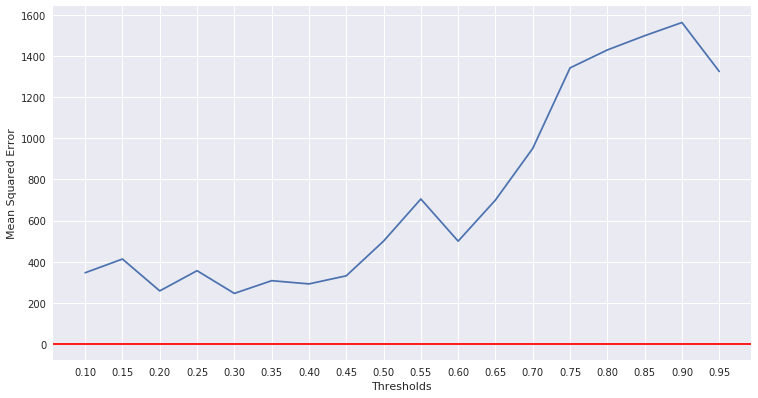

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.xticks(r)
plt.plot(r,MSE)
plt.axhline(y=error, color='r', linestyle='-');

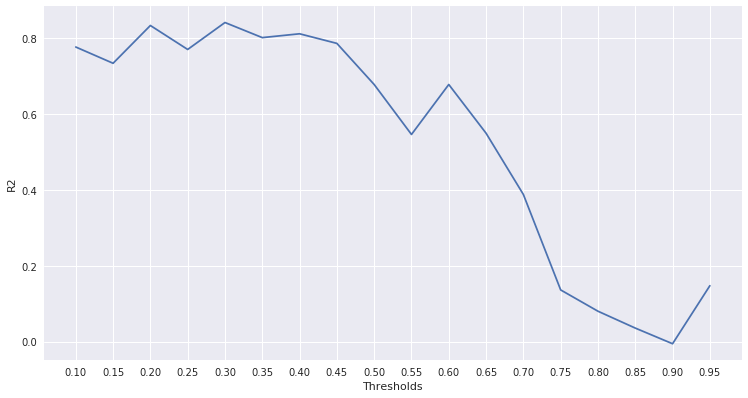

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2);

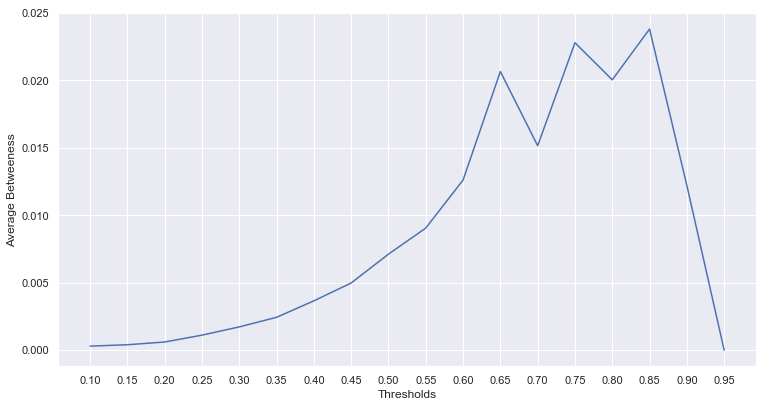

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Average Betweeness")
plt.xlabel("Thresholds")
plt.plot(r,average_betweennes);

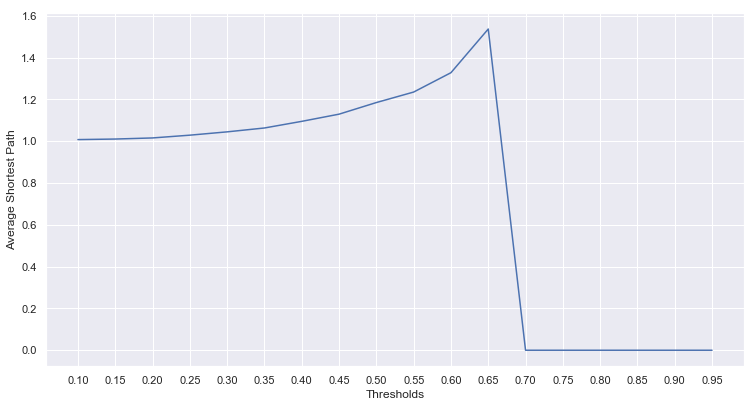

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.ylabel("Average Shortest Path")
plt.xlabel("Thresholds")
plt.xticks(r)
plt.plot(r,average_shortest_path_length);

In [70]:
data = data_deseasonal

# Random Forest with train set

In [103]:
average_degree = []
second_moment = []
variance = []
shannon_entropy = []
transitivity_pr = []
average_cluster= []
average_shortest_path_length = []
average_closeness = []
average_betweennes = []
average_eigenvector = []
average_pagerank =  []
r = np.arange(0.1,1,0.05)
degree = []
R2 = []
MSE = []
density = []
S = []
components = []

regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
for i in range(len(r)):
    n = data.shape[1]
    m = nb.weighted_matrix(data[:M-2,:])
    G, c = nb.graph_builder_limit(m, r[i])
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    density.append(2 * G.number_of_edges()/(len(G)*(len(G)-1)))
    S.append(len(max(nx.connected_component_subgraphs(G), key=len)))
    components.append(c)
    
 #   average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
  #  average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
   # average_pagerank = graph_average_calculator(G)
    
    degree = dict(G.degree())
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    
    average_degree.append(nb.momment_of_degree_distribution(G,1))                  #First Moment
    second_moment.append(nb.momment_of_degree_distribution(G,2))                   #Second Moment
    variance.append(nb.momment_of_degree_distribution(G,2) - nb.momment_of_degree_distribution(G,1)**2)     #Variance
    shannon_entropy.append(nb.shannon_entropy(G))                                  #Shanon Entropy
    transitivity_pr.append(nx.transitivity(G))                                     #Transitivity 
    average_cluster.append(nx.average_clustering(G))
    if nx.is_connected(G) == True:
        average_shortest_path_length.append(nx.average_shortest_path_length(G))     #Average Shortest Path
    else:
        average_shortest_path_length.append(0)
  
    average_closeness.append(np.mean(list(closseness.values())))                       #Average closeness centrality
    average_betweennes.append(np.mean(list(betweeness.values())))                        #Average betweenness centrality
    average_eigenvector.append(np.mean(list(eigenvector.values())))                      #Average eigenvector centrality
    average_pagerank.append(np.mean(list(pagerank.values())))
    
    X = feature_extractorNew(G)        
    Y = data[M-2,:]
    Y_test = data[M-1,:]
    regr.fit(X, Y)
    y = regr.predict(X)
    R2.append(r2_score(Y_test,y))
    MSE.append(mean_squared_error(Y_test, y))
    #MSE.append(np.mean(np.power(Y_test-y,2)/np.std(data,axis=0)))  

In [104]:
null = exponential_smoothing(data, 0.5)
#error = np.mean(np.power(Y_test-null,2)/np.std(data,axis=0))
error = mean_squared_error(Y_test, null)
null_r2 = r2_score(Y_test, null)

In [88]:
len(decomp.seasonal)

841

In [110]:
np.set_printoptions(suppress=True)

In [112]:
pr[16:23,10:16,-1]

array([[ 0.  ,  0.03,  0.02,  0.11,  2.71, 28.17],
       [ 0.  ,  0.04,  0.17,  1.67, 11.66, 36.88],
       [ 0.  ,  0.  ,  0.79,  9.37, 32.08, 77.05],
       [ 0.  ,  0.  ,  1.7 , 10.09, 27.77, 71.02],
       [ 0.  ,  0.  ,  0.6 ,  7.74, 32.33, 64.3 ],
       [ 0.  ,  0.03,  0.86,  3.62, 27.83, 57.56],
       [ 0.01,  0.  ,  0.6 ,  4.02,  8.44, 18.3 ]], dtype=float32)

In [111]:
Y_test

array([ 0.        ,  0.03      ,  0.02      ,  0.11      ,  2.71000004,
       28.17000008,  0.        ,  0.04      ,  0.17      ,  1.66999996,
       11.65999985, 36.88000107,  0.        ,  0.        ,  0.79000002,
        9.36999989, 32.08000183, 77.05000305,  0.        ,  0.        ,
        1.70000005, 10.09000015, 27.77000046, 71.01999664,  0.        ,
        0.        ,  0.60000002,  7.73999977, 32.33000183, 64.30000305,
        0.        ,  0.03      ,  0.86000001,  3.61999989, 27.82999992,
       57.56000137,  0.01      ,  0.        ,  0.60000002,  4.01999998,
        8.43999958, 18.29999924])

In [106]:
null

array([ 10.69614722,  24.85501224,  44.37256849,  75.40678396,
        90.02529884, 102.50324404,   8.43699236,  29.88834344,
        43.88875601,  64.35138536, 102.03025293, 125.58785506,
        13.0268233 ,  26.35848781,  42.38985438,  67.35946578,
        97.64626616, 149.57349346,  14.81202274,  21.83735787,
        36.19960903,  73.46741246, 100.12196515, 139.99355162,
         8.6698517 ,  17.74142666,  35.62743792,  59.42037105,
        99.90348537, 137.79553555,  13.49407156,  21.83459781,
        32.53268758,  45.83674697,  91.52825639, 119.07353008,
         8.21520177,  25.95723918,  30.06778746,  41.41142823,
        83.51391696, 136.28371408])

In [94]:
y

array([ 0.63984439,  0.63984439,  0.63984439, 23.39804263, 23.39804263,
       46.32590128,  0.63984439,  0.63984439,  0.63984439, 23.39804263,
       23.39804263, 77.63517044,  0.63984439,  0.63984439,  0.63984439,
       23.39804263, 23.39804263, 69.61126447,  0.63984439,  0.63984439,
        0.63984439, 23.39804263, 23.39804263, 77.63517044,  0.63984439,
        0.63984439,  0.63984439, 23.39804263, 23.39804263, 78.28603691,
        0.63984439,  0.63984439,  0.63984439,  0.63984439, 23.39804263,
       78.48291334,  0.63984439,  0.63984439,  0.63984439,  0.63984439,
       23.39804263, 69.32113587])

In [95]:
X

[[34,
  0.8541666666666666,
  34,
  0.0,
  0.022475481444667603,
  0.14896619677952386,
  1.0],
 [35,
  0.8723404255319149,
  34,
  0.00030487804878048775,
  0.02304612367541995,
  0.15270577264169938,
  0.9882352941176471],
 [38,
  0.9318181818181818,
  34,
  0.0022591744593335266,
  0.024807083033620784,
  0.16221355122291697,
  0.9374110953058321],
 [41,
  1.0,
  34,
  0.006661181728854477,
  0.02668523347335287,
  0.16921848217377386,
  0.874390243902439],
 [41,
  1.0,
  34,
  0.006661181728854477,
  0.02668523347335287,
  0.16921848217377383,
  0.874390243902439],
 [18, 0.640625, 18, 0.0, 0.013761542615635133, 0.0738424218560861, 1.0],
 [34,
  0.8541666666666666,
  34,
  0.0,
  0.022475481444667603,
  0.14896619677952389,
  1.0],
 [36,
  0.8913043478260869,
  34,
  0.0008556910569105689,
  0.02362839688728804,
  0.1560199195054651,
  0.9714285714285714],
 [39,
  0.9534883720930233,
  34,
  0.0032275816916242203,
  0.02540951252492343,
  0.16497142926302888,
  0.9190283400809717],


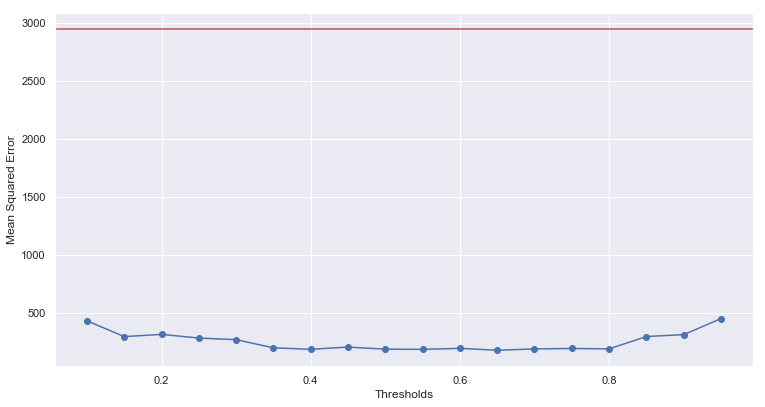

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
#plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MSE,'-o')
plt.axhline(y=error, color='r', linestyle='-');

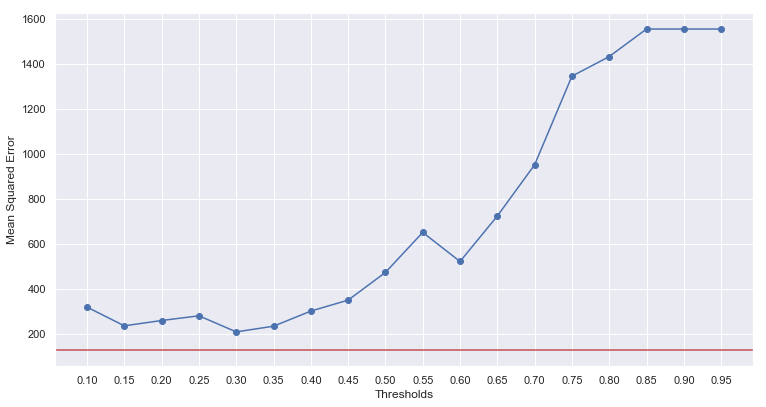

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MSE,'-o')
plt.axhline(y=error, color='r', linestyle='-');

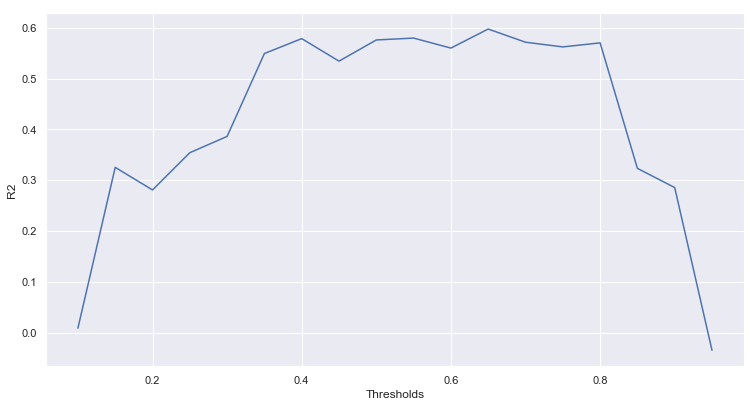

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
#plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2);

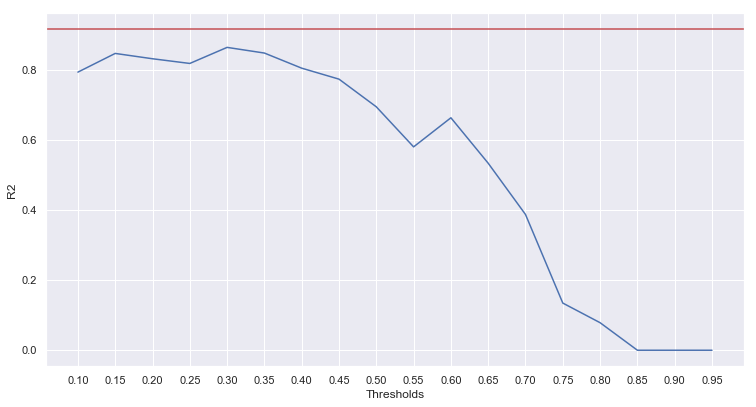

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2)
plt.axhline(y=null_r2, color='r', linestyle='-');

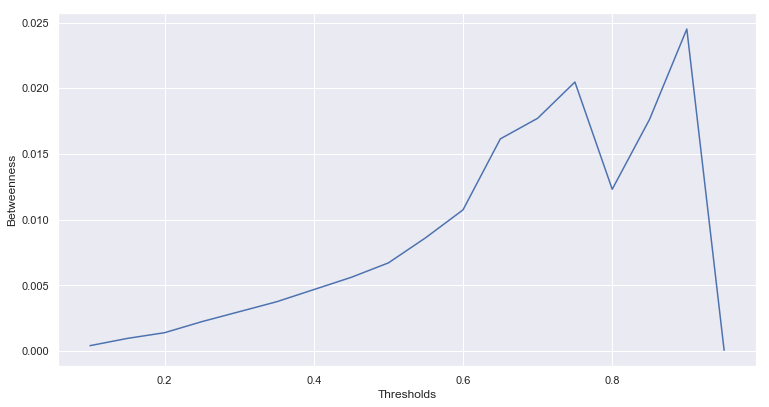

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
#plt.xticks(r)
plt.ylabel("Betweenness")
plt.xlabel("Thresholds")
plt.plot(r,average_betweennes);

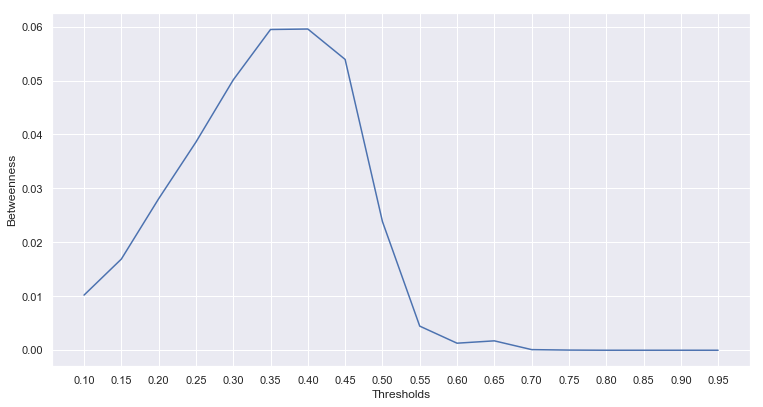

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Betweenness")
plt.xlabel("Thresholds")
plt.plot(r,average_betweennes);

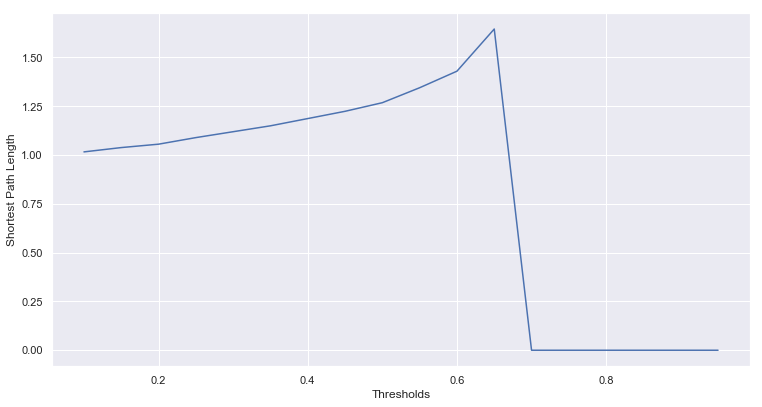

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
#plt.xticks(r)
plt.ylabel("Shortest Path Length")
plt.xlabel("Thresholds")
plt.plot(r,average_shortest_path_length);

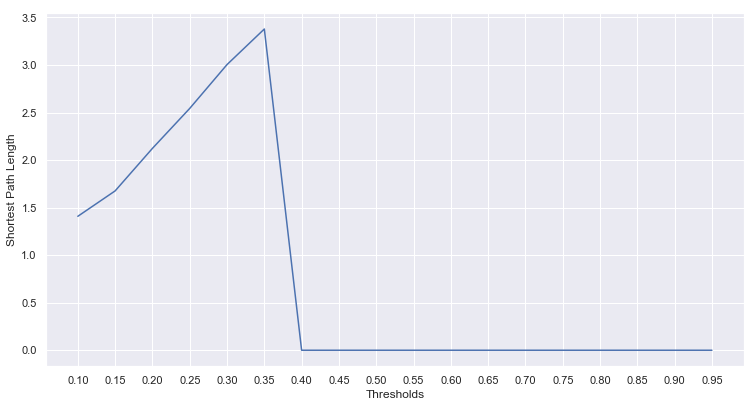

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Shortest Path Length")
plt.xlabel("Thresholds")
plt.plot(r,average_shortest_path_length);

In [203]:
data = deseasonal_annual_anomaly(data)

In [15]:
r = np.arange(0.1,1,0.05)

In [17]:
data_deseasonal = cf.deseasonal_STL(data)

AttributeError: 'list' object has no attribute 'shape'

In [7]:
R2, MSE, average_betweennes, average_shortest_path_length, error, null_r2 = cf.model(data,"LR","normal")

In [107]:
data_deseasonal, data_seasonal = deseasonal_STL(data)

In [94]:
data_anomaly, avgs = deseasonal_monthly_anomaly(data)

In [95]:
data_anomaly1, avgs = deseasonal_monthly_anomaly(data[:M-2,:])

In [98]:
data_anomaly.shape

(841, 42)

# Linear Regression

In [108]:
average_degree = []
second_moment = []
variance = []
shannon_entropy = []
transitivity_pr = []
average_cluster= []
average_shortest_path_length = []
average_closeness = []
average_betweennes = []
average_eigenvector = []
average_pagerank =  []
r = np.arange(0.1,1,0.05)
degree = []
R2 = []
MSE = []
MAPE = []
components = []
density = []
S = []
degree = []
average_degree = []
second_moment = []
variance = []
shannon_entropy = []
transitivity_pr = []
average_cluster= []
average_shortest_path_length = []
average_closeness = []
average_betweennes = []
average_eigenvector = []
average_pagerank =  []
regr = linear_model.LinearRegression()
for i in range(len(r)):
    n = data.shape[1]
    m = nb.weighted_matrix(data_deseasonal[:M-2,:])
    G, c = nb.graph_builder_limit(m, r[i])
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    density.append(1 - (2 * G.number_of_edges()/(len(G)*(len(G)-1))))
    S.append(len(max(nx.connected_component_subgraphs(G), key=len)))
    components.append(c)
    
    #average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
    #average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
    #average_pagerank = graph_average_calculator(G)
    degree = dict(G.degree())
    closseness = nx.closeness_centrality(G)
    kcore = dict(nx.core_number(G))
    betweeness= dict(nx.betweenness_centrality(G))
    pagerank = dict(nx.pagerank(G, alpha=0.85))
    #eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    eigenvector = dict(nx.eigenvector_centrality_numpy(G))
    
    average_degree.append(nb.momment_of_degree_distribution(G,1))                  #First Moment
    second_moment.append(nb.momment_of_degree_distribution(G,2))                   #Second Moment
    variance.append(nb.momment_of_degree_distribution(G,2) - nb.momment_of_degree_distribution(G,1)**2)     #Variance
    shannon_entropy.append(nb.shannon_entropy(G))                                  #Shanon Entropy
    transitivity_pr.append(nx.transitivity(G))                                     #Transitivity 
    average_cluster.append(nx.average_clustering(G))
    if nx.is_connected(G) == True:
        average_shortest_path_length.append(nx.average_shortest_path_length(G))     #Average Shortest Path
    else:
        average_shortest_path_length.append(0)
  
    average_closeness.append(np.mean(list(closseness.values())))                       #Average closeness centrality
    average_betweennes.append(np.mean(list(betweeness.values())))                        #Average betweenness centrality
    average_eigenvector.append(np.mean(list(eigenvector.values())))                      #Average eigenvector centrality
    average_pagerank.append(np.mean(list(pagerank.values())))
    
    X = feature_extractor(G)        
    Y = data_deseasonal[M-1,:]
    Y_test = data[M-1,:]
    regr.fit(X, Y)
    y = regr.predict(X)
    y = y + data_seasonal[M-1,:]
    #y = y + avgs[0,:]
    R2.append(r2_score(Y_test,y))
    
    
    
    
    MSE.append(mean_squared_error(Y_test, y))
    #MAPE.append(np.mean(np.abs((Y_test - y) / Y_test)) * 100)
    #MSE.append(np.mean(np.power(Y_test-y,2)/np.std(data,axis=0)))

In [83]:
Y_test + avgs[0,:]

array([0.00000000e+00, 9.18309847e-02, 7.59154925e-02, 3.86943665e+00,
       2.61566198e+01, 9.16753523e+01, 3.38028167e-03, 1.70422531e-01,
       4.25070421e-01, 7.46478871e+00, 4.30323942e+01, 1.08110283e+02,
       1.22535210e-02, 1.95633800e-01, 1.79957749e+00, 1.77542252e+01,
       6.43878892e+01, 1.54021693e+02, 1.07042254e-02, 3.42253515e-02,
       3.65366203e+00, 1.97723945e+01, 5.41307049e+01, 1.41338306e+02,
       6.90140859e-03, 1.80281691e-02, 1.11408453e+00, 1.54556336e+01,
       6.39890162e+01, 1.28478173e+02, 4.33802818e-02, 1.13802816e-01,
       1.75661973e+00, 7.64704212e+00, 5.68828169e+01, 1.16201973e+02,
       6.43661971e-02, 2.77464786e-02, 1.24647890e+00, 8.98154929e+00,
       2.14754925e+01, 5.59505625e+01])

In [38]:
null = exponential_smoothing(data_deseasonal, 0.5)
error = mean_squared_error(Y_test, null)
null_r2 = r2_score(Y_test, null)

In [13]:
trace = go.Scatter(
    x = r,
    y = MSE
)

data = [trace]
layout = {}
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='line-mode')

In [12]:
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines',
    name = 'lines'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'markers',
    name = 'markers'
)
data = [trace0, trace1, trace2]

py.iplot(data, filename='line-mode')

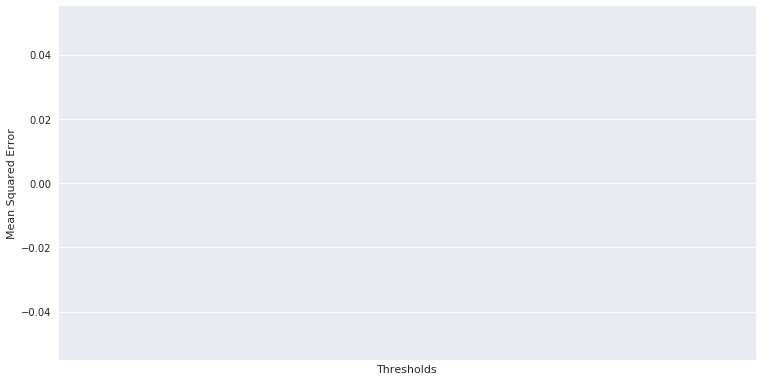

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MAPE);
#plt.axhline(y=error, color='r', linestyle='-');

In [101]:
Y_test

array([0.00000000e+00, 2.99999993e-02, 1.99999996e-02, 1.09999999e-01,
       2.71000004e+00, 2.81700001e+01, 0.00000000e+00, 3.99999991e-02,
       1.70000002e-01, 1.66999996e+00, 1.16599998e+01, 3.68800011e+01,
       0.00000000e+00, 0.00000000e+00, 7.90000021e-01, 9.36999989e+00,
       3.20800018e+01, 7.70500031e+01, 0.00000000e+00, 0.00000000e+00,
       1.70000005e+00, 1.00900002e+01, 2.77700005e+01, 7.10199966e+01,
       0.00000000e+00, 0.00000000e+00, 6.00000024e-01, 7.73999977e+00,
       3.23300018e+01, 6.43000031e+01, 0.00000000e+00, 2.99999993e-02,
       8.60000014e-01, 3.61999989e+00, 2.78299999e+01, 5.75600014e+01,
       9.99999978e-03, 0.00000000e+00, 6.00000024e-01, 4.01999998e+00,
       8.43999958e+00, 1.82999992e+01])

In [102]:
y

array([-3.42918425, -3.32532822, -3.3996212 ,  0.42783471, 20.38341505,
       60.57023124, -3.3819386 , -3.26896384, -3.19636776,  2.46985909,
       28.32454076, 68.31523535, -3.31552061, -3.13634308, -2.30472445,
        4.96649535, 29.00533084, 73.51041084, -3.33590847, -3.38426264,
       -1.44399689,  6.25747052, 22.86951718, 66.87051189, -3.45309645,
       -3.33625991, -2.83796824,  4.37772972, 28.27326286, 60.81778796,
       -3.38183691, -3.33244818, -2.54027028,  0.68863326, 25.62335685,
       55.23056912, -3.28558009, -3.32625482, -2.68414228,  1.55148567,
        9.62127885, 34.55078804])

In [103]:
avgs[0,:]

array([0.00000000e+00, 6.22857137e-02, 5.64285714e-02, 3.81157146e+00,
       2.37428572e+01, 6.40101429e+01, 3.42857141e-03, 1.31714283e-01,
       2.56285711e-01, 5.85371431e+00, 3.16540000e+01, 7.17210000e+01,
       1.24285713e-02, 1.98428569e-01, 1.01271429e+00, 8.37014286e+00,
       3.23111429e+01, 7.69705716e+01, 1.08571429e-02, 3.47142851e-02,
       1.95728572e+00, 9.67657144e+00, 2.63405716e+01, 7.03082851e+01,
       7.00000014e-03, 1.82857143e-02, 5.12857141e-01, 7.71528573e+00,
       3.16494288e+01, 6.41764292e+01, 4.40000002e-02, 8.45714285e-02,
       8.97142854e-01, 4.03285713e+00, 2.90702858e+01, 5.86574283e+01,
       5.50000001e-02, 2.81428569e-02, 6.47142858e-01, 4.97500002e+00,
       1.31011428e+01, 3.79269999e+01])

In [109]:
y

array([ 57.78005838,  31.61055931,  -3.20690149, -24.3483679 ,
       -17.84059391,  15.4491625 ,  61.32794066,  22.12598207,
         0.60739489, -24.26480116,  -7.5979179 ,   7.56695585,
        54.9608616 ,  30.11856803,  -3.65284911, -17.56343838,
        -5.45867878,   7.45457715,  54.11649676,  31.82995281,
         2.59425351, -26.86404408, -28.21591444,   5.57744907,
        66.97034069,  38.63129331,   0.68973763, -15.26327684,
       -20.42109499,   4.73464954,  59.03612239,  43.14802319,
        13.94585733,  -4.19322199, -24.70224042,  10.97263668,
        63.39865659,  33.228364  ,  23.66363235,   7.78228567,
        -8.24808049,  20.08961773])

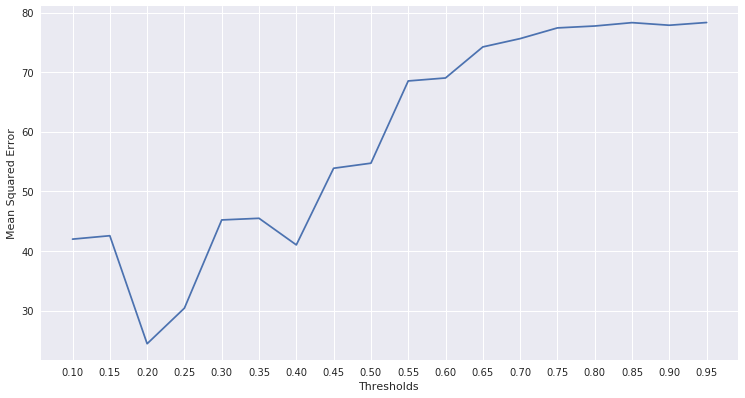

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MSE);
#plt.axhline(y=error, color='r', linestyle='-');

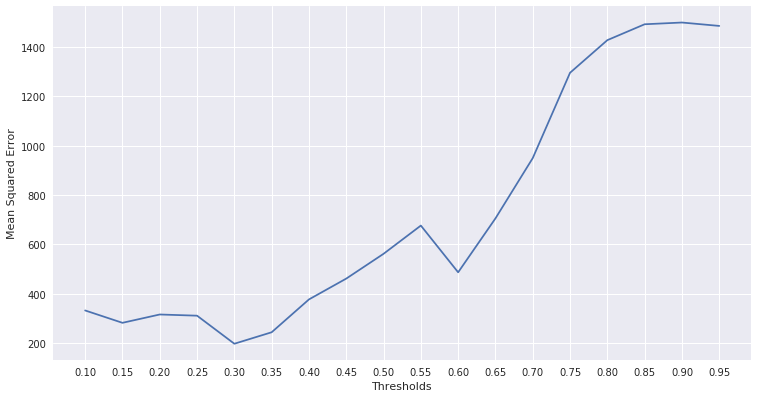

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MSE);
#plt.axhline(y=error, color='r', linestyle='-');

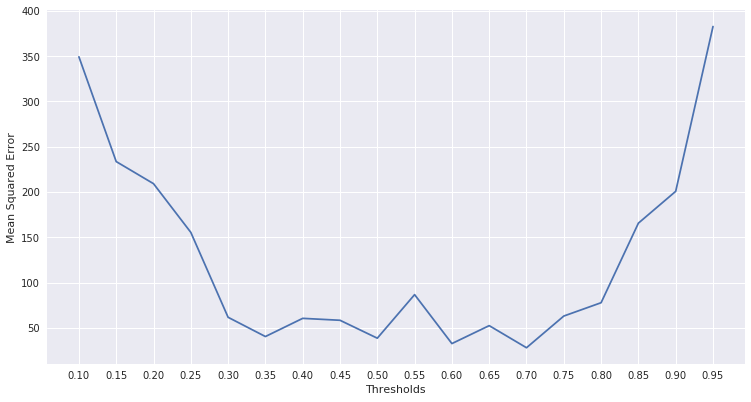

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Mean Squared Error")
plt.xlabel("Thresholds")
plt.plot(r,MSE);
#plt.axhline(y=error, color='r', linestyle='-');

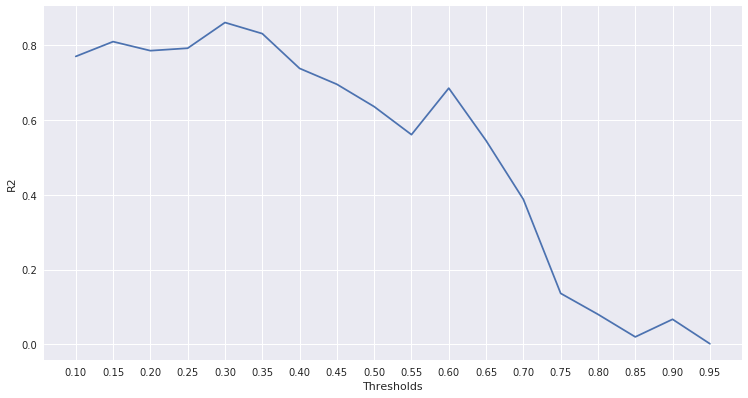

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2);
#plt.axhline(y=null_r2, color='r', linestyle='-');

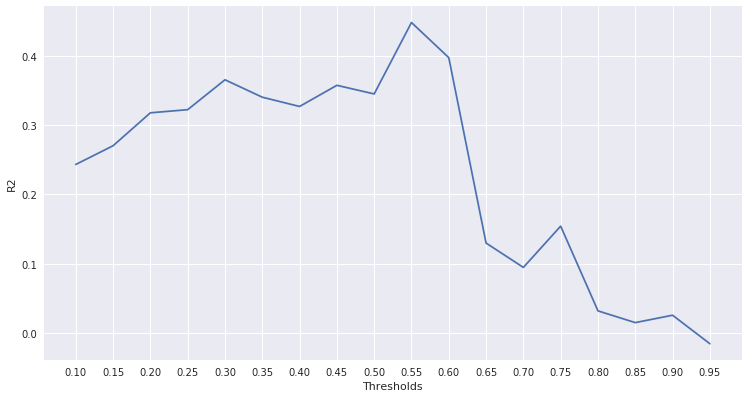

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2);
#plt.axhline(y=null_r2, color='r', linestyle='-');

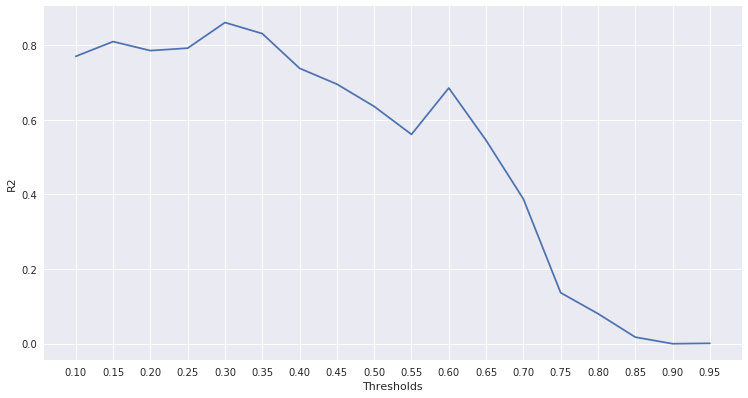

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("R2")
plt.xlabel("Thresholds")
plt.plot(r,R2);
#plt.axhline(y=null_r2, color='r', linestyle='-');

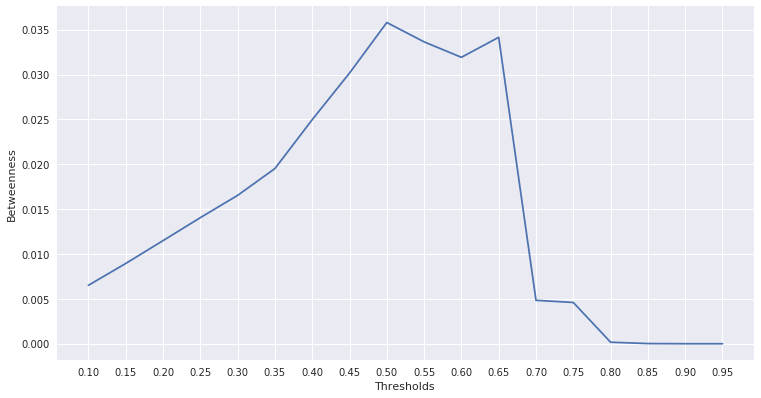

In [230]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Betweenness")
plt.xlabel("Thresholds")
plt.plot(r,average_betweennes);

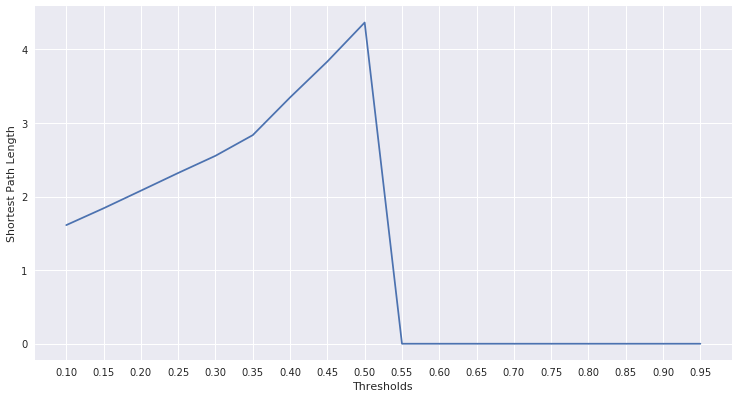

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Shortest Path Length")
plt.xlabel("Thresholds")
plt.plot(r,average_shortest_path_length);

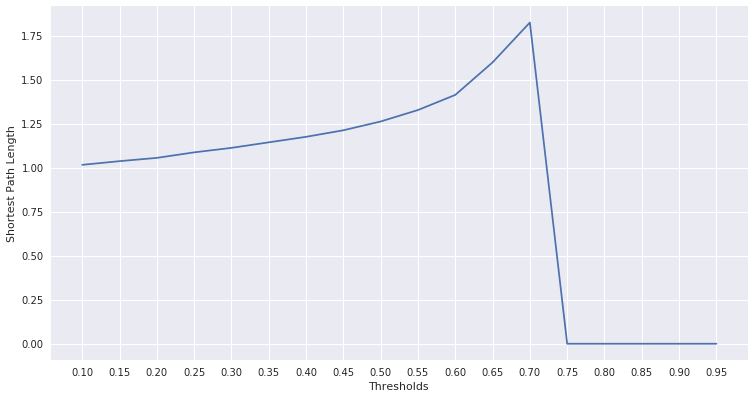

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Shortest Path Length")
plt.xlabel("Thresholds")
plt.plot(r,average_shortest_path_length);

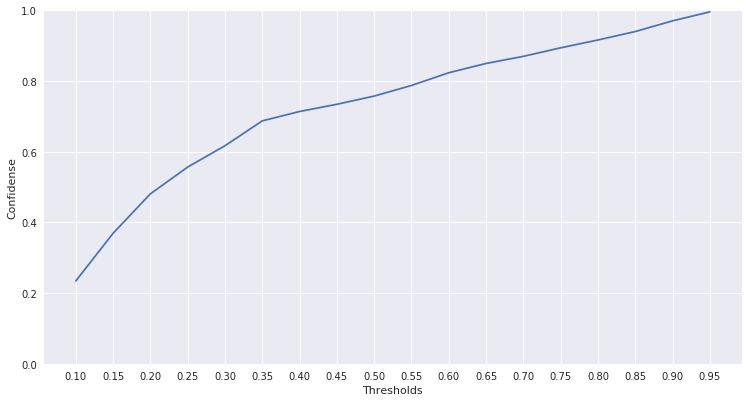

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Confidense")
plt.xlabel("Thresholds")
ax.set_ylim(ymin=0)
plt.plot(r,density);

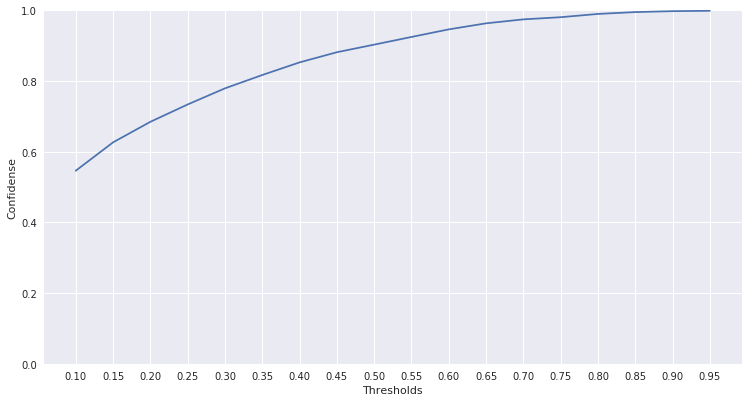

In [233]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
plt.xticks(r)
plt.ylabel("Confidense")
plt.xlabel("Thresholds")
ax.set_ylim(ymin=0)
plt.plot(r,density);

In [30]:
average_degree = []
second_moment = []
variance = []
shannon_entropy = []
transitivity_pr = []
average_cluster= []
average_shortest_path_length = []
average_closeness = []
average_betweennes = []
average_eigenvector = []
average_pagerank =  []
r = np.arange(0.1,1,0.05)
degree = []
R2 = []
MSE = []
density = []
S = []
components = []

regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

n = data.shape[1]
m = nb.weighted_matrix(data[:M-2,:])
G, c = nb.graph_builder_limit(m, 0.9)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
density.append(2 * G.number_of_edges()/(len(G)*(len(G)-1)))
S.append(len(max(nx.connected_component_subgraphs(G), key=len)))
components.append(c)

#   average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
#  average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
# average_pagerank = graph_average_calculator(G)

degree = dict(G.degree())
closseness = nx.closeness_centrality(G)
kcore = dict(nx.core_number(G))
betweeness= dict(nx.betweenness_centrality(G))
pagerank = dict(nx.pagerank(G, alpha=0.9))
eigenvector = dict(nx.eigenvector_centrality(G, max_iter = 1000))

average_degree.append(nb.momment_of_degree_distribution(G,1))                  #First Moment
second_moment.append(nb.momment_of_degree_distribution(G,2))                   #Second Moment
variance.append(nb.momment_of_degree_distribution(G,2) - nb.momment_of_degree_distribution(G,1)**2)     #Variance
shannon_entropy.append(nb.shannon_entropy(G))                                  #Shanon Entropy
transitivity_pr.append(nx.transitivity(G))                                     #Transitivity 
average_cluster.append(nx.average_clustering(G))
if nx.is_connected(G) == True:
    average_shortest_path_length.append(nx.average_shortest_path_length(G))     #Average Shortest Path
else:
    average_shortest_path_length.append(0)

average_closeness.append(np.mean(list(closseness.values())))                       #Average closeness centrality
average_betweennes.append(np.mean(list(betweeness.values())))                        #Average betweenness centrality
average_eigenvector.append(np.mean(list(eigenvector.values())))                      #Average eigenvector centrality
average_pagerank.append(np.mean(list(pagerank.values())))

X = feature_extractor(G)        
Y = data[M-2,:]
Y_test = data[M-1,:]
regr.fit(X, Y)
y = regr.predict(X)
R2.append(r2_score(Y_test,y))
MSE.append(mean_squared_error(Y, y))
#MSE.append(np.mean(np.power(Y_test-y,2)/np.std(data,axis=0)))

In [165]:
np.std(data,axis=0)

array([ 48.2212521 ,  77.0549924 , 101.20671704, 101.13459907,
        74.98530447,  58.86950563,  52.32502106,  81.2923667 ,
        98.34804061,  92.63821121,  68.28793819,  55.50365972,
        63.32387348,  79.73295009,  91.86908489,  92.15032903,
        70.28356286,  52.77371599,  63.78561857,  70.07779138,
        81.62767178,  94.18346089,  72.03553514,  53.70434175,
        39.57335477,  57.23329428,  87.69222267,  84.46873678,
        76.00590948,  60.11857671,  40.11307959,  57.15520593,
        79.08213296,  75.95948982,  72.67456156,  47.41537431,
        39.86695078,  61.96450555,  71.27692553,  63.60771107,
        65.23709177,  48.9656701 ])

In [31]:
regr.feature_importances_

array([1.78040028e-01, 1.80394444e-01, 2.95618992e-01, 3.08540444e-04,
       1.77404527e-01, 1.67946441e-01, 2.87027921e-04])

In [34]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [35]:
indices

array([2, 1, 0, 4, 5, 3, 6])

In [166]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = {0:'degree',1:'closseness',2:'kcore',3:'betweeness',4:'pagerank', 5:'eigenvector',6:'clustering'}
featuresNew = {0:'degree',1:'average neighbour degree',2:'pagerank',3:'clustering'}
# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[1])):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. closseness (0.493592)
2. kcore (0.203290)
3. eigenvector (0.149785)
4. degree (0.084042)
5. clustering (0.038277)
6. pagerank (0.025142)
7. betweeness (0.005871)


In [44]:
R2_RF = np.load("R2_RF.npy")
r = np.arange(0.1,1,0.05)
r = np.arange(0.1,1,0.01)

In [45]:
R2_RF

array([0.99999697, 0.99998147, 0.99994402, 0.99986195, 0.99979992,
       0.99976361, 0.99965808, 0.9962181 , 0.99620643, 0.99622225,
       0.99622225, 0.99621848, 0.99622451, 0.99621848, 0.99620266,
       0.99620002, 0.996217  , 0.99619856, 0.9961895 , 0.99619666,
       0.99592462, 0.99245209, 0.99238787, 0.99238744, 0.99243146,
       0.99222795, 0.99222345, 0.98870434, 0.98869093, 0.98869093,
       0.98868979, 0.98868905, 0.98870881, 0.98858975, 0.98861395,
       0.98858975, 0.98858975, 0.98869431, 0.98869431, 0.98869431,
       0.98499981, 0.98497313, 0.98497313, 0.98500279, 0.97760271,
       0.97760271, 0.97758946, 0.97760124, 0.97026514, 0.96662089,
       0.96299345, 0.96298217, 0.95937911, 0.95578173, 0.95220092,
       0.9486351 , 0.94863439, 0.93449148, 0.9275298 , 0.92063961,
       0.89688032, 0.8902509 , 0.88694647, 0.87707711, 0.84514227,
       0.82050822, 0.80252064, 0.77065899, 0.75660069, 0.71335768,
       0.6876034 , 0.65547956, 0.62480357, 0.59326021, 0.55275

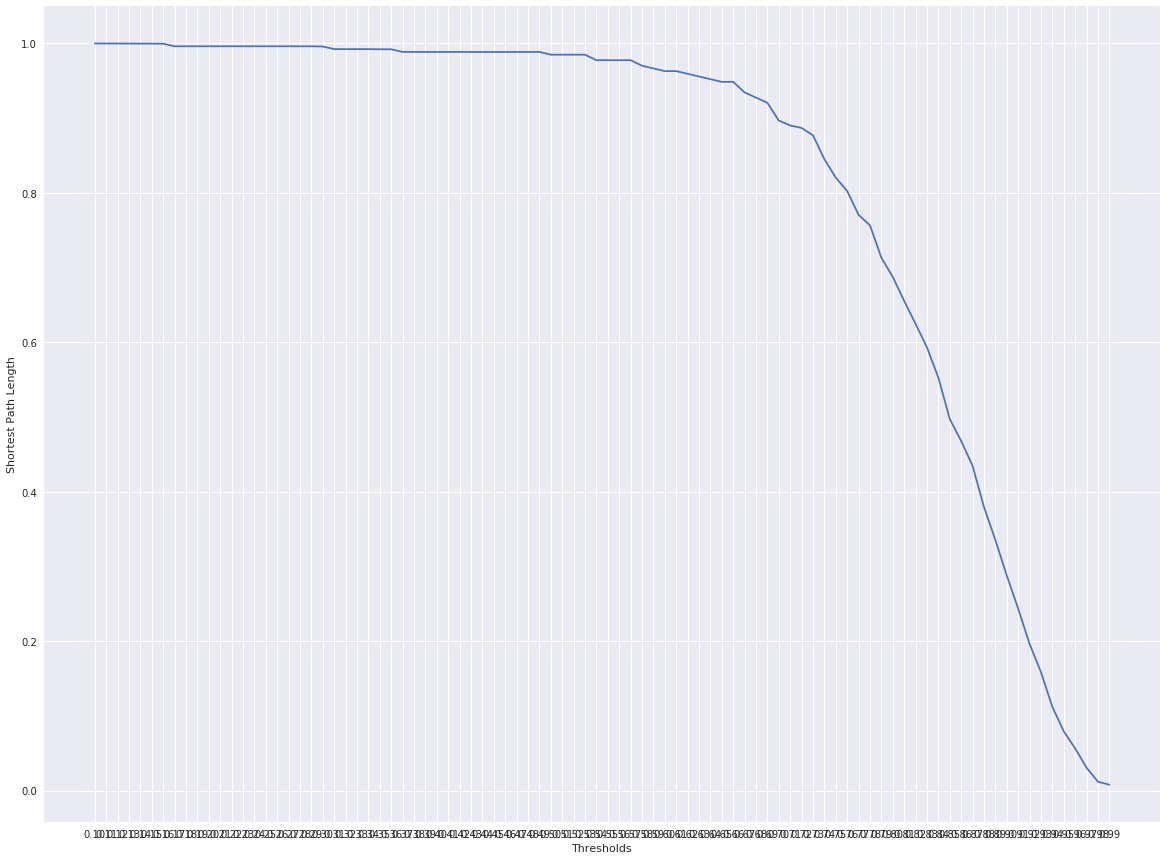

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
plt.xticks(r)
plt.ylabel("Shortest Path Length")
plt.xlabel("Thresholds")
plt.plot(r,R2_RF);

In [ ]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 25, 10, ), random_state=1)


In [63]:
X = []
for i in range(n):
    if (i in degree.keys()):
        x = []
        #x.append(i)
        x.append(degree[i])
        x.append(closseness[i])
        x.append(kcore[i])
        x.append(betweeness[i])
        x.append(pagerank[i])
        x.append(eigenvector[i])
        x.append(nx.clustering(G, i))
        X.append(x)

In [64]:
Y = data[999,:]

In [59]:
clf.fit(X, Y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
y = clf.predict(X)

In [ ]:
r = np.arange(0.1,1,0.05)
components = []
density = []
S = []
degree = []
R2 = []
MSE = []

clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50,20, ), random_state=1)
for i in range(len(r)):
    n = data.shape[1]
    m = nb.weighted_matrix(data[:M-301,:])
    G, c = nb.graph_builder_limit(m, r[i])
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    
    density.append(2 * G.number_of_edges()/(len(G)*(len(G)-1)))
    S.append(len(max(nx.connected_component_subgraphs(G), key=len)))
    components.append(c)

    X = feature_extractor(G)           
    Y = data[M-301,:]
    clf.fit(X, Y)
    
    m = nb.weighted_matrix(data[M-300:M-1,:])
    G_test, c = nb.graph_builder_limit(m, r[i])
    G_test = G_test.to_undirected()
    G_test.remove_edges_from(nx.selfloop_edges(G_test))
    
    X_test = feature_extractor(G_test)
    average_degree,second_moment,variance,shannon_entropy,transitivity_pr,average_cluster,
    average_shortest_path_length, average_closeness, average_betweennes, average_eigenvector,
    average_pagerank = graph_average_calculator(G)
    
    
    Y_test = data[M-1,:]
    y_pred = clf.predict(X_test)
    R2.append(r2_score(Y_test,y_pred))
    MSE.append(mean_squared_error(Y_test,y_pred))

In [44]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y = regr.predict(X)

In [33]:
r2_score(Y,y) #0.7

0.23477677804210784

In [39]:
r2_score(Y,y) #0.5

0.2398545888861583

In [46]:
r2_score(Y,y) #0.3

0.19948335276926576

In [ ]:
import numpy.ma as ma
import math
import numpy as np
from netCDF4 import Dataset
from scipy import stats
import networkx as nx
import pandas as pd


f_temp = Dataset('temp0818.nc')
f_pre = Dataset('pre0818.nc')

air = f_temp.variables['air']
pr_wtr = f_pre.variables['pr_wtr']

N = f_temp['time'].shape[0]

air = np.flip(air, 1)
pr_wtr = np.flip(pr_wtr, 1)

f_spei = Dataset('spei12.nc')
spei_data = f_spei.variables['spei']

def weighted_matrix(data, spei_data):
    lat_number = data.shape[1]
    lon_number = data.shape[2]
    N = lat_number * lon_number
    pearson_r = np.zeros((N,N))
    
    for i in range(N):
        lat_index = math.floor(i/lon_number)
        lon_index = i%lon_number
        if ma.is_masked(data[-1,lat_index ,lon_index]) or np.isnan(spei_data[-1,lat_index,lon_index]): 
            pearson_r[i,:] = np.nan
            continue;
        for j in range(N):
            lat_index_sec = math.floor(j/lon_number)
            lon_index_sec = j%lon_number
            if ma.is_masked(data[-1,lat_index_sec ,lon_index_sec]) or np.isnan(spei_data[-1,lat_index_sec,lon_index_sec]) or data[-1,lat_index_sec ,lon_index_sec]==-9.96921e+36:
                pearson_r[i,j] = np.nan
            else:
                pearson_r[i,j] = stats.pearsonr(data[:,lat_index ,lon_index],data[:,lat_index_sec ,lon_index_sec])[0]
                
    new = int(math.sqrt((pearson_r.shape[0] * pearson_r.shape[1]) - np.count_nonzero(np.isnan(pearson_r))))
    pearson_r_clean = pearson_r[~np.isnan(pearson_r)].reshape((new,new))
    return(pearson_r, pearson_r_clean)

def graph_builder (weighted_matrix):
    weighted_matrix = np.exp(-np.sqrt(1 - weighted_matrix))
    componenets_number = 0
    limit = 1.0
    while componenets_number != 1:
        limit -= 0.01
        adjacency_matrix = np.zeros(weighted_matrix.shape)
        adjacency_matrix[weighted_matrix >= limit] = 1
        G = nx.from_numpy_matrix(adjacency_matrix)
        G = G.to_undirected()
        Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        componenets_number = len(Gcc)
    return(G)

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H


curr_year = 2008
spei_start = 1295

year = []
average_degree_pr = []
second_moment_pr = []
variance_pr = []
shannon_entropy_pr = []
transitivity_pr = []
average_cluster_pr = []
average_shortest_path_length_pr = []
diameter_pr = []
global_efficiency_pr = []
local_efficiency_pr = []
average_closeness_pr = []
average_betweennes_pr = []
average_eigenvector_pr = []
average_pagerank_pr = []
assortativity_pr = []

average_degree_air = []
second_moment_air = []
variance_air = []
shannon_entropy_air = []
transitivity_air = []
average_cluster_air = []
average_shortest_path_length_air = []
diameter_air = []
global_efficiency_air = []
local_efficiency_air = []
average_closeness_air = []
average_betweennes_air = []
average_eigenvector_air = []
average_pagerank_air = []
assortativity_air = []

lon = np.arange(-40.0,72.0,2.5)
lat = np.arange(-50.0,51.0,2.5)
X = []
lat_number = len(lat)
lon_number = len(lon)

for z in range(math.floor(N/365)):
    
    spei = np.zeros((lat_number,lon_number))
    for i in range(79,280,5):
        for j in range(279,500,5):
            lat_index = int((i-79)/5)
            lon_index = int((j-279)/5)
            spei_index = spei_start + z*12
            if ma.is_masked(spei_data[-1,i,j]) or ma.is_masked(spei_data[-1,i,j+1]) or ma.is_masked(spei_data[-1,i+1,j]) or ma.is_masked(spei_data[-1,i+1,j+1]):
                spei[lat_index,lon_index]= np.nan
            else:
                spei[lat_index,lon_index] = (np.mean(spei_data[spei_index:spei_index + 12,i,j]) + np.mean(spei_data[spei_index:spei_index + 12,i,j+1]) 
                                           + np.mean(spei_data[spei_index:spei_index + 12,i+1,j]) + np.mean(spei_data[spei_index:spei_index + 12,i+1,j+1]))/4
    
    pr_matrix, pr_weighted_matrix = weighted_matrix(pr_wtr[z*365:z*365 + 365,:,:], spei_data)
       
    G_pr = graph_builder(pr_weighted_matrix)
    G_pr = G_pr.to_undirected()
    G_pr.remove_edges_from(nx.selfloop_edges(G_pr))
    
    vk_pr = dict(G_pr.degree())
    CLC_pr = nx.closeness_centrality(G_pr)
    KC_pr = dict(nx.core_number(G_pr))
    B_pr = dict(nx.betweenness_centrality(G_pr))
    PR_pr = dict(nx.pagerank(G_pr, alpha=0.85))
    EC_pr = dict(nx.eigenvector_centrality(G_pr, max_iter = 1000))
                  
    year.append(curr_year)
    
    average_degree_pr.append(momment_of_degree_distribution(G_pr,1))                  #First Moment
    second_moment_pr.append(momment_of_degree_distribution(G_pr,2))                   #Second Moment
    variance_pr.append(momment_of_degree_distribution(G_pr,2) - momment_of_degree_distribution(G_pr,1)**2)     #Variance
    shannon_entropy_pr.append(shannon_entropy(G_pr))                                  #Shanon Entropy
    transitivity_pr.append(nx.transitivity(G_pr))                                     #Transitivity 
    average_cluster_pr.append(nx.average_clustering(G_pr))
    #if nx.is_connected(G_pr) == True:
    average_shortest_path_length_pr.append(nx.average_shortest_path_length(G_pr))     #Average Shortest Path
    diameter_pr.append(nx.diameter(G_pr))                                             #Diameter   
    global_efficiency_pr.append(nx.global_efficiency(G_pr))                           #Efficiency
    local_efficiency_pr.append(nx.local_efficiency(G_pr))                             #Average Local Efficiency  
    average_closeness_pr.append(np.mean(list(CLC_pr.values())))                       #Average closeness centrality
    average_betweennes_pr.append(np.mean(list(B_pr.values())))                        #Average betweenness centrality
    average_eigenvector_pr.append(np.mean(list(EC_pr.values())))                      #Average eigenvector centrality
    average_pagerank_pr.append(np.mean(list(PR_pr.values())))                         #Average PageRank Centrality
    assortativity_pr.append(nx.degree_assortativity_coefficient(G_pr))                #Assortativity
    
    
    air_matrix, air_weighted_matrix = weighted_matrix(air[z*365:z*365 + 365,:,:], spei_data)
    
    G_air = graph_builder(air_weighted_matrix)
    G_air = G_air.to_undirected()
    G_air.remove_edges_from(nx.selfloop_edges(G_air))
    
    vk_air = dict(G_air.degree())
    CLC_air = nx.closeness_centrality(G_air)
    KC_air = dict(nx.core_number(G_air))
    B_air = dict(nx.betweenness_centrality(G_air))
    PR_air = dict(nx.pagerank(G_air, alpha=0.85))
    EC_air = dict(nx.eigenvector_centrality(G_air, max_iter = 1000))
                  
    average_degree_air.append(momment_of_degree_distribution(G_air,1))                  #First Moment
    second_moment_air.append(momment_of_degree_distribution(G_air,2))                   #Second Moment
    variance_air.append(momment_of_degree_distribution(G_air,2) - momment_of_degree_distribution(G_air,1)**2)     #Variance
    shannon_entropy_air.append(shannon_entropy(G_air))                                  #Shanon Entropy
    transitivity_air.append(nx.transitivity(G_air))                                     #Transitivity 
    average_cluster_air.append(nx.average_clustering(G_air))
    #if nx.is_connected(G_air) == True:
    average_shortest_path_length_air.append(nx.average_shortest_path_length(G_air))     #Average Shortest Path
    diameter_air.append(nx.diameter(G_air))                                             #Diameter   
    global_efficiency_air.append(nx.global_efficiency(G_air))                           #Efficiency
    local_efficiency_air.append(nx.local_efficiency(G_air))                             #Average Local Efficiency fficiency  
    average_closeness_air.append(np.mean(list(CLC_air.values())))          #Average closeness centrality
    average_betweennes_air.append(np.mean(list(B_air.values())))           #Average betweenness centrality
    average_eigenvector_air.append(np.mean(list(EC_air.values())))         #Average eigenvector centrality
    average_pagerank_air.append(np.mean(list(PR_air.values())))
    assortativity_air.append(nx.degree_assortativity_coefficient(G_air))                    #Assortativity   
    
    rows,cols = np.where(~np.isnan(pr_matrix))
    nodes = np.unique(rows)
    for i in range(np.unique(rows).shape[0]):
        lat_index = math.floor(nodes[i]/lon_number)
        lon_index = nodes[i] % lon_number
        if (i in vk_pr.keys()) and (np.count_nonzero(np.isnan(spei[:,lat_index,lon_index])) == 0):
            x = []
            x.append(curr_year)
            x.append(lat_index)
            x.append(lon_index)
            x.append(vk_air[i])
            x.append(CLC_air[i])
            x.append(KC_air[i])
            x.append(B_air[i])
            x.append(PR_air[i])
            x.append(EC_air[i])
            x.append(nx.clustering(G_air, i))
            x.append(vk_pr[i])
            x.append(CLC_pr[i])
            x.append(KC_pr[i])
            x.append(B_pr[i])
            x.append(PR_pr[i])
            x.append(EC_pr[i])
            x.append(nx.clustering(G_pr, i))
            for k in range(13):
                x.append(spei[k,lat_index,lon_index])
            X.append(x)
                
    curr_year += 1

df_X = pd.DataFrame(X,columns=['year','lat','lon','vk_air','CLC_air','KC_air','B_air','PR_air','EC_air','clustering_air',
                                'vk_pr','CLC_pr','KC_pr','B_pr','PR_pr','EC_pr','clustering_pr','SPEI'])
    
df_pr = pd.DataFrame(list(zip(year, average_degree_pr, second_moment_pr, variance_pr, shannon_entropy_pr, transitivity_pr,
                           average_cluster_pr, average_closeness_pr, average_betweennes_pr, average_eigenvector_pr,
                           average_pagerank_pr, assortativity_pr,average_shortest_path_length_pr,diameter_pr,global_efficiency_pr,local_efficiency_pr)),
                 columns=['year', 'average_degree_pr', 'second_moment_pr', 'variance_pr', 'shannon_entropy_pr',
                          'transitivity_pr', 'average_cluster_pr', 'average_closeness_pr', 'average_betweennes_pr',
                          'average_eigenvector_pr', 'average_pagerank_pr','assortativity_pr','average_shortest_path_length_pr','diameter_pr,global_efficiency_pr','local_efficiency_pr'])
df_air = pd.DataFrame(list(zip(year, average_degree_air, second_moment_air, variance_air, shannon_entropy_air, transitivity_air,
                           average_cluster_air, average_closeness_air, average_betweennes_air, average_eigenvector_air,
                           average_pagerank_air, assortativity_air,average_shortest_path_length_air,diameter_air,global_efficiency_air,local_efficiency_air)),
                 columns=['year', 'average_degree_air', 'second_moment_air', 'variance_air', 'shannon_entropy_air',
                          'transitivity_air', 'average_cluster_air','average_closeness_air', 'average_betweennes_air',
                          'average_eigenvector_air', 'average_pagerank_air','assortativity_air','average_shortest_path_length_air','diameter_air','global_efficiency_air','local_efficiency_air'])
    
df_pr.to_csv('pr.csv')    
df_air.to_csv('air.csv')
df_X.to_csv('Xdata.csv')